## Linear Regression 

This code is to help us visualize the linear regression models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear_model(a,b,x):
    return a*x + b

In [36]:
x = np.linspace(0, 2, 5)
y = linear_model(2, 1, x) + np.random.uniform(-5, 5,size=x.shape)

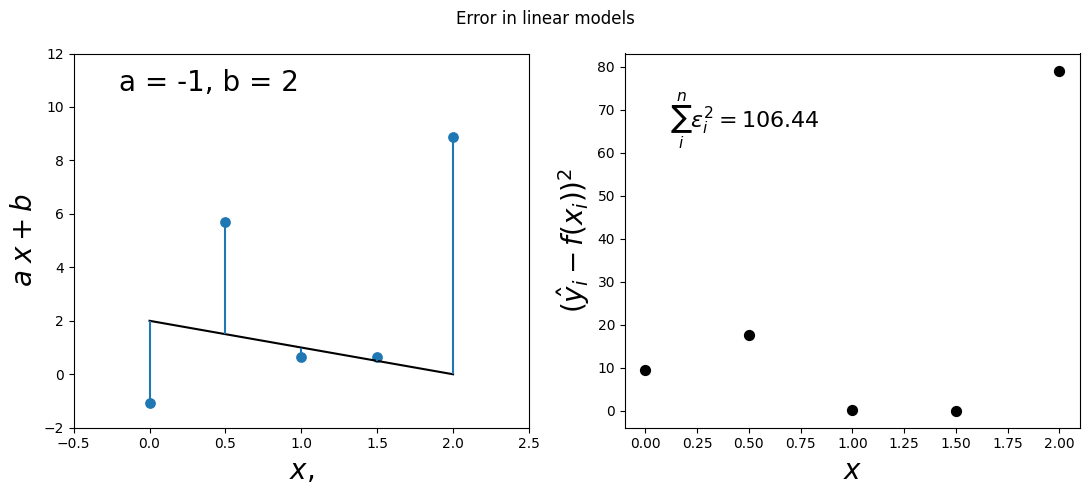

In [84]:
a = -1
b = 2

x_grid = np.linspace(0, 2, 100)
y_grid = linear_model(a, b, x_grid)

y_pred = linear_model(a, b, x)
error = y_pred - y

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,5))
fig.suptitle('Error in linear models')

# left panel 
ax1.plot(x_grid, y_grid, c='k')
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    if error_i > 0:
        ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
    else:
        ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
ax1.text(0.1, .9, f'a = {a}, b = {b}', fontsize=20, transform=ax1.transAxes)
ax1.scatter(x, y, s=45)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-2, 12)
ax1.set_ylabel(r'$a\;x + b$', fontsize=20)
ax1.set_xlabel(r'$x$,', fontsize=20)

# right panel
sum_errors = 0.
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    sum_errors += error_i**2

    ax2.scatter(xi, error_i**2, color='k', s=50)
ax2.text(0.1, 0.8, r'$\sum_i^n \epsilon_i^2 = $' + f'{sum_errors:.2f}',
         transform=ax2.transAxes, fontsize=16)
ax2.set_ylabel(r'$(\hat{y}_i - f(x_i))^2$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)

plt.tight_layout()

## Mean squared error
$$
{\cal L}(\mathbf{w}) = \frac{1}{n} \sum_{i=i}^{n} \ell_i(\mathbf{w}) = \frac{1}{n} \sum_{i=i}^{n} \frac{1}{2} \left (\hat{y}_i - \mathbf{w}^\top x \right )^2 = \frac{1}{n} \sum_{i=i}^{n} \frac{1}{2} \left (\hat{y}_i - a\;x + b \right )^2
$$

In [86]:
def linear_model_total_error(a, b, x,y):
    y_pred = linear_model(a, b, x)
    error = y_pred - y
    error_sqr = error**2
    return 0.5 * np.mean(error_sqr)

Text(0, 0.5, 'Mean Square Error')

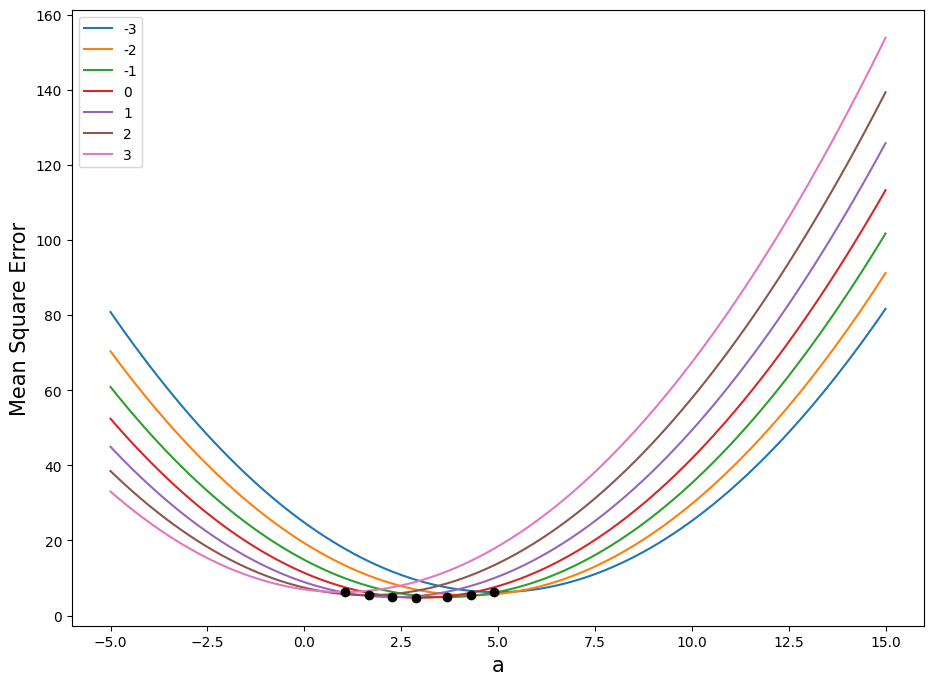

In [116]:
a_grid = np.linspace(-5,15,100)
b_grid = np.arange(-3,4,1)

plt.figure(figsize=(11,8))
for bi in b_grid:
    total_errors = [linear_model_total_error(a, bi, x, y) for a in a_grid]
    total_errors = np.asanyarray(total_errors)
    i0 = np.argmin(total_errors)
    a_best = a_grid[i0]
    plt.plot(a_grid, total_errors,label=bi)
    plt.scatter(a_best,total_errors[i0],color='k',zorder=2.5)
    
plt.legend()
# plt.ylim(-0,20)
plt.xlabel('a',fontsize=15)
plt.ylabel('Mean Square Error', fontsize=15)

In [141]:
# %matplotlib inline
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

RuntimeError: 'widget is not a recognised GUI loop or backend name

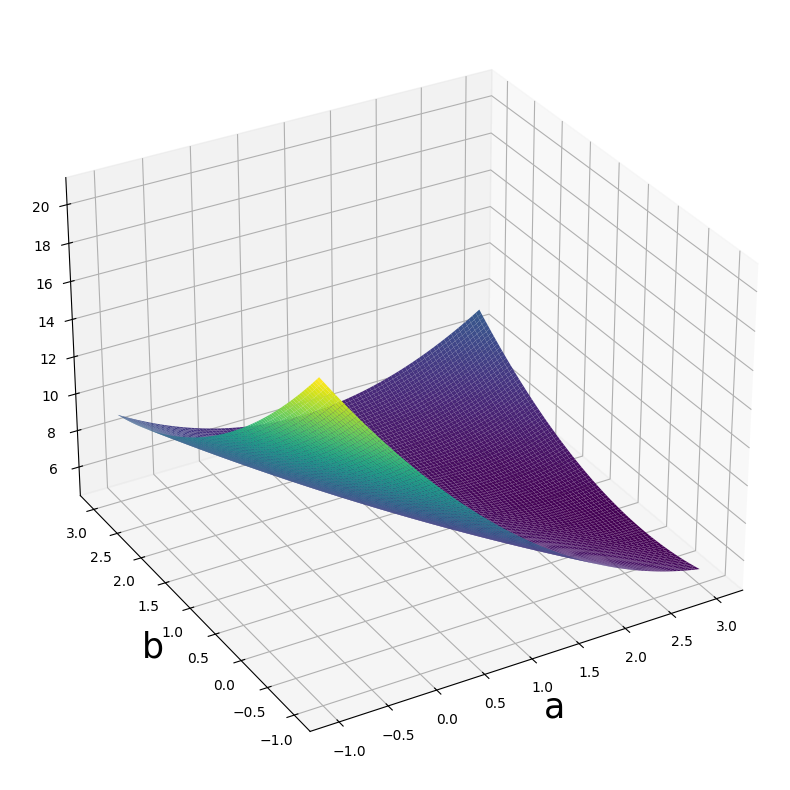

In [140]:
a_grid = np.linspace(-1, 3, 100)
b_grid = np.linspace(-1, 3,  100)
a_, b_ = np.meshgrid(a_grid, b_grid)
a_b = np.column_stack((a_.flatten(), b_.flatten()))

total_error_ = []
for abi in a_b:
    a,b = abi[0],abi[1]
    ei = linear_model_total_error(a, b, x, y)
    total_error_.append(ei)

total_error_ = np.array(total_error_).reshape(a_.shape)

plt.figure(figsize=(11, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(a_, b_, total_error_, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('a',fontsize=25)
ax.set_ylabel('b', fontsize=25)
ax.view_init(elev=30, azim=-120)
plt.tight_layout()